In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
dat = pd.read_csv('./public_150k_plus_220703.csv', index_col = 'LoanNumber')


In [3]:
# import glob
# l = glob.glob('public_up*.csv')
# liste = []
# for file in l:
#     i = pd.read_csv('./'+file, index_col = 'LoanNumber')
#     liste.append(i)
# dat = liste[0]

/tmp/ipykernel_764/1768907214.py:5: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  i = pd.read_csv('./'+file, index_col = 'LoanNumber')
/tmp/ipykernel_764/1768907214.py:5: DtypeWarning: Columns (16,50) have mixed types. Specify dtype option on import or set low_memory=False.
  i = pd.read_csv('./'+file, index_col = 'LoanNumber')
/tmp/ipykernel_764/1768907214.py:5: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  i = pd.read_csv('./'+file, index_col = 'LoanNumber')


Since loading data takes up a lot of time and compute, have loaded just the above 150k file. Can change the file using the above code and do the corresponding analysis. Though, the comments in markdown are for the 150k + file only

In [4]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
SBAOfficeCode,899974.0,827.962813,193.935332,101.00,669.00,914.000,942.0000,9030.00
Term,900000.0,44.150241,18.023216,0.00,24.00,60.000,60.0000,79.00
SBAGuarantyPercentage,900000.0,100.000000,0.000000,100.00,100.00,100.000,100.0000,100.00
InitialApprovalAmount,900000.0,41271.310691,48049.245945,0.00,19782.00,27295.000,56865.0000,10000000.00
CurrentApprovalAmount,900000.0,40858.866530,34685.045574,10.00,19875.00,27322.000,56696.8875,149999.50
UndisbursedAmount,899928.0,0.771909,180.383022,0.00,0.00,0.000,0.0000,99455.00
ServicingLenderLocationID,899974.0,179765.860435,203959.740136,20.00,12096.00,72601.000,437389.0000,538160.00
JobsReported,900000.0,5.770444,11.874128,-6.00,1.00,3.000,7.0000,500.00
NAICSCode,886629.0,545661.801509,189857.400948,111110.00,448120.00,541512.000,711410.0000,999990.00
UTILITIES_PROCEED,271834.0,879.125391,3697.664144,0.00,1.00,1.000,1.0000,148700.00


In [5]:
dat.head()

,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
LoanNumber,,,,,,,,,,,,,,,,,,,,,
3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,Paid in Full,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,Paid in Full,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,Paid in Full,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,Paid in Full,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,Paid in Full,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021


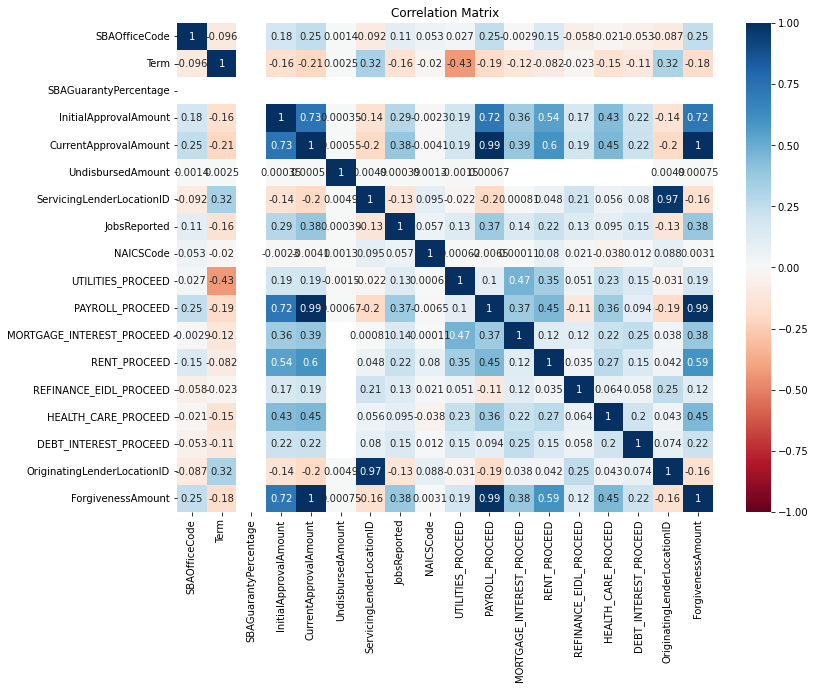

In [6]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(dat.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

In [7]:
list(dat)

['DateApproved',
 'SBAOfficeCode',
 'ProcessingMethod',
 'BorrowerName',
 'BorrowerAddress',
 'BorrowerCity',
 'BorrowerState',
 'BorrowerZip',
 'LoanStatusDate',
 'LoanStatus',
 'Term',
 'SBAGuarantyPercentage',
 'InitialApprovalAmount',
 'CurrentApprovalAmount',
 'UndisbursedAmount',
 'FranchiseName',
 'ServicingLenderLocationID',
 'ServicingLenderName',
 'ServicingLenderAddress',
 'ServicingLenderCity',
 'ServicingLenderState',
 'ServicingLenderZip',
 'RuralUrbanIndicator',
 'HubzoneIndicator',
 'LMIIndicator',
 'BusinessAgeDescription',
 'ProjectCity',
 'ProjectCountyName',
 'ProjectState',
 'ProjectZip',
 'CD',
 'JobsReported',
 'NAICSCode',
 'Race',
 'Ethnicity',
 'UTILITIES_PROCEED',
 'PAYROLL_PROCEED',
 'MORTGAGE_INTEREST_PROCEED',
 'RENT_PROCEED',
 'REFINANCE_EIDL_PROCEED',
 'HEALTH_CARE_PROCEED',
 'DEBT_INTEREST_PROCEED',
 'BusinessType',
 'OriginatingLenderLocationID',
 'OriginatingLender',
 'OriginatingLenderCity',
 'OriginatingLenderState',
 'Gender',
 'Veteran',
 'NonProf

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 3509338307 to 6738528803
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DateApproved                 900000 non-null  object 
 1   SBAOfficeCode                899974 non-null  float64
 2   ProcessingMethod             900000 non-null  object 
 3   BorrowerName                 899998 non-null  object 
 4   BorrowerAddress              899860 non-null  object 
 5   BorrowerCity                 899859 non-null  object 
 6   BorrowerState                899850 non-null  object 
 7   BorrowerZip                  899861 non-null  object 
 8   LoanStatusDate               802345 non-null  object 
 9   LoanStatus                   900000 non-null  object 
 10  Term                         900000 non-null  int64  
 11  SBAGuarantyPercentage        900000 non-null  int64  
 12  InitialApprovalAmount        900000 non-null 

In [9]:
(dat['InitialApprovalAmount'] != dat['CurrentApprovalAmount']).sum()

28442

Just about 5 % of approval amount change

In [10]:
dat['BorrowerState'].value_counts()

CA    470224
AL    158650
AZ    153453
AR     96184
AK     21031
AS       304
AE         4
Name: BorrowerState, dtype: int64

# Demographic Analysis

In [11]:
dat['Ethnicity'].value_counts()

Unknown/NotStated         638135
Not Hispanic or Latino    232143
Hispanic or Latino         29722
Name: Ethnicity, dtype: int64

In [12]:
dat['Race'].value_counts()

Unanswered                                   678353
White                                        119309
Asian                                         45578
Black or African American                     44599
American Indian or Alaska Native              11002
Native Hawaiian or Other Pacific Islander      1135
Multi Group                                      15
Eskimo & Aleut                                    8
Puerto Rican                                      1
Name: Race, dtype: int64

In [13]:
dat.groupby('Race').mean().sort_values('InitialApprovalAmount')

,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
Race,,,,,,,,,,,,,,,,,,
Black or African American,659.511974,57.307496,100.0,21433.124094,21325.149881,1.913333,319302.461187,2.147784,590372.805164,85.720690,21152.380641,3415.519935,6308.150367,6707.482174,3538.251698,2187.587857,320358.652047,21912.329697
Puerto Rican,914.000000,60.000000,100.0,23800.000000,23800.000000,0.000000,48270.000000,2.000000,541890.000000,1.000000,23797.000000,NaN,NaN,NaN,NaN,NaN,48270.000000,23953.550000
American Indian or Alaska Native,598.363785,47.639157,100.0,30409.612392,30343.353702,0.000000,56256.799109,4.874023,546549.107902,180.867473,30132.743089,2676.920441,7692.680921,916.526316,3574.584750,3335.855185,55751.574948,31106.320178
Unanswered,836.273391,43.149745,100.0,41248.814574,40819.578851,0.515284,182390.618706,5.738154,543654.266474,1026.907664,39979.633046,3396.668041,7181.171258,3350.662991,3339.933358,1704.900343,182063.131700,42263.770276
Eskimo & Aleut,1048.000000,55.500000,100.0,43084.175000,43084.175000,0.000000,52534.500000,4.250000,308453.125000,2200.800000,40082.425000,NaN,NaN,NaN,13000.000000,NaN,52534.500000,46560.114286
White,835.150680,44.925010,100.0,44739.061887,44370.194012,1.251454,137042.724741,6.019504,515034.225928,886.567728,43335.298812,5282.636124,8442.511608,4618.319405,4700.030496,2575.333985,134453.817059,45115.762143
Native Hawaiian or Other Pacific Islander,912.093392,46.752423,100.0,45862.185877,45936.287004,97.376220,192433.678414,7.922467,575891.370072,686.489407,44993.366302,4525.140000,8922.694063,5000.000000,3780.772727,3408.700526,191523.914537,47348.456766
Asian,903.539668,43.230001,100.0,54442.611475,53771.437848,0.000000,145549.132366,9.306990,611095.569186,782.198965,52462.114597,5518.825032,9808.886208,3610.798802,3279.846543,2193.330615,141043.447146,53848.562282
Multi Group,929.733333,40.800000,100.0,58661.166667,60929.100000,0.000000,89110.400000,6.000000,523569.500000,1.000000,60928.033333,NaN,NaN,NaN,NaN,NaN,89110.400000,60269.324667


The average amount disparity between races is visible. This might be due to bias among lender or just a lower representation from those communities.

In [14]:
dat.groupby('Race')['Gender'].value_counts(normalize = True).unstack()

Gender,Female Owned,Male Owned,Unanswered
Race,,,
American Indian or Alaska Native,0.301309,0.553081,0.145610
Asian,0.329567,0.601672,0.068761
Black or African American,0.507993,0.468732,0.023274
Eskimo & Aleut,NaN,0.875000,0.125000
Multi Group,0.066667,0.933333,NaN
Native Hawaiian or Other Pacific Islander,0.343612,0.592070,0.064317
Puerto Rican,NaN,1.000000,NaN
Unanswered,0.063751,0.155819,0.780430
White,0.284597,0.677526,0.037876


It is interesting to note how the proportion of genders getting loans varies among races and provides insight into the financial independence of women in different races. While African American has 28 % female owned and Puerto Rican has 29 %, American Indians have only 19 %.


# State-Wise

In [15]:
dat['BorrowerState'].value_counts()

CA    470224
AL    158650
AZ    153453
AR     96184
AK     21031
AS       304
AE         4
Name: BorrowerState, dtype: int64

In [16]:
(dat['ProjectState']!=dat['BorrowerState']).sum()

178

Only 148 out of the total 968k odd entries have different Borrower and Project states


In [17]:
(dat['ProjectState'] != dat['ServicingLenderState']).sum()

580729

However, half of the projects had taken loans from lenders from other states

In [18]:
dat['ServicingLenderState'].value_counts()

CA    196535
OH     81451
NC     80833
AL     62917
AR     61672
SD     57813
NJ     47575
FL     40180
UT     37817
AZ     35855
PA     35479
NY     29382
TX     27792
AK     15812
MS     12969
OK     10687
MO      8591
DE      8405
GA      8362
TN      4879
OR      3948
ID      3857
WA      3588
IL      3444
ND      2607
NM      2266
MT      2161
CO      1960
NE      1837
VA      1725
KS      1635
LA      1015
MN      1004
IN       669
WI       487
MA       379
IA       341
AS       335
WV       328
NV       301
MI       236
GU       193
HI       173
KY       114
RI        90
WY        76
MD        68
CT        48
SC        45
DC        13
ME        10
VT         7
NH         4
PR         3
VI         1
Name: ServicingLenderState, dtype: int64

In [19]:
dat.groupby('ProjectState').mean().sort_values('InitialApprovalAmount', ascending = False)

,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
ProjectState,,,,,,,,,,,,,,,,,,
MI,515.000000,24.000000,100.0,126798.000000,126798.000000,0.000000,9551.000000,20.000000,NaN,NaN,126798.000000,NaN,NaN,NaN,NaN,NaN,9551.000000,127836.700000
MT,885.000000,5.000000,100.0,116664.000000,116664.000000,0.000000,41844.000000,12.000000,515111.000000,NaN,116664.000000,NaN,NaN,NaN,NaN,NaN,41844.000000,NaN
WI,920.000000,24.000000,100.0,91600.000000,91600.000000,0.000000,110359.000000,16.500000,721110.000000,NaN,91600.000000,NaN,NaN,NaN,NaN,NaN,110359.000000,92620.025000
PA,358.000000,24.000000,100.0,89900.000000,89900.000000,0.000000,56102.000000,9.000000,424320.000000,NaN,89900.000000,NaN,NaN,NaN,NaN,NaN,56102.000000,90449.250000
SC,464.000000,24.000000,100.0,86238.780000,86238.780000,0.000000,19248.000000,38.000000,695045.000000,NaN,86238.780000,NaN,NaN,NaN,NaN,NaN,19248.000000,87157.972000
TX,758.800000,38.400000,100.0,60792.860000,60792.860000,0.000000,64861.200000,17.400000,539168.000000,1.000000,60792.060000,NaN,NaN,NaN,NaN,NaN,64861.200000,59754.840000
CA,921.325843,41.810592,100.0,55391.024694,54734.938580,0.737098,160359.555295,7.624339,555913.333005,1066.073096,53591.876238,4607.177721,8935.725321,4119.548815,3821.097090,1884.336426,160069.195242,55699.118727
MO,721.000000,2.000000,100.0,52800.000000,52800.000000,0.000000,4512.000000,8.000000,522291.000000,NaN,52800.000000,NaN,NaN,NaN,NaN,NaN,4512.000000,NaN
FL,588.250000,24.000000,100.0,41046.012500,42871.012500,0.000000,128261.500000,7.500000,655083.500000,NaN,42871.012500,NaN,NaN,NaN,NaN,NaN,128261.500000,43237.352500


Surprisingly, the states giving higher number of loans do not directly correlate with the avg loan amount dispersed at each state.

In [20]:
dat['BusinessType'].value_counts(normalize= True)*100

Corporation                            29.862932
Sole Proprietorship                    25.799468
Limited  Liability Company(LLC)        18.273308
Subchapter S Corporation               10.797935
Self-Employed Individuals               5.586388
Independent Contractors                 4.458086
Non-Profit Organization                 2.071794
Partnership                             1.369898
Limited Liability Partnership           0.613770
Single Member LLC                       0.442075
Professional Association                0.382620
Cooperative                             0.108685
501(c)3 – Non Profit                    0.094794
501(c)6 – Non Profit Membership         0.046897
Trust                                   0.027227
Non-Profit Childcare Center             0.026449
Tenant in Common                        0.012891
Qualified Joint-Venture (spouses)       0.009335
Joint Venture                           0.008779
Employee Stock Ownership Plan(ESOP)     0.004112
Tribal Concerns     

In [21]:
cols = dat['BusinessType'].value_counts().index

In [22]:
dat.groupby('ProjectState')['BusinessType'].value_counts(normalize = True).unstack().fillna(0)[cols[:5]]*100

BusinessType,Corporation,Sole Proprietorship,Limited Liability Company(LLC),Subchapter S Corporation,Self-Employed Individuals
ProjectState,,,,,
AE,50.000000,25.000000,0.000000,0.000000,0.000000
AK,17.147070,31.768455,28.748097,8.190639,5.217846
AL,11.958070,40.883476,19.864352,6.132521,8.923641
AR,12.882766,38.338446,17.415129,9.584611,9.601248
AS,63.157895,18.092105,1.315789,0.328947,0.328947
AZ,14.634894,25.019391,33.418502,7.463776,6.754616
CA,44.897712,18.139626,12.506434,13.831778,3.277733
CT,0.000000,100.000000,0.000000,0.000000,0.000000
FL,25.000000,0.000000,50.000000,25.000000,0.000000


Here, we can observe which states have diverse industries vs the states that have all their eggs in one basket

# Jobs and Loan Amount relation
We can observe from the correlation heatmap that jobs have a high correlation (0.75) with the loan amount.
Let us try to explore this

<AxesSubplot:xlabel='JobsReported', ylabel='CurrentApprovalAmount'>

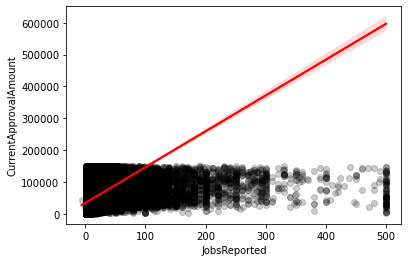

In [23]:

sns.regplot(
    x = 'JobsReported', y = 'CurrentApprovalAmount', data = dat,  scatter_kws={"color": "black", "marker" : ",", "alpha" : 0.2}, line_kws={"color": "red"}
)